# EDA con Jupiter Notebook: Amazon Sales Dataset

 Base de datos de Kaglee https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

Este conjunto de datos tiene los datos de 1K+ Calificaciones y reseñas de productos de Amazon según sus detalles enumerados en el sitio web oficial de Amazon.

Características

- product_id : Identificación del producto
- product_name : Nombre del Producto
- category : Categoría del Producto
- discounted_price : Precio con descuento del producto
- actual_price : Precio real del producto
- discount_percentage : Porcentaje de Descuento para el Producto
- rating : Valoración del Producto
- rating_count : Número de personas que votaron por la calificación de Amazon
- about_product : Descripción sobre el Producto
- user_id : ID del usuario que escribió la reseña del Producto
- user_name: nombre del usuario que escribió la reseña del producto
- review_id : ID de la reseña del usuario
- review_title : Breve reseña
- review_content : Reseña larga
- img_link : Enlace de imagen del producto
- product_link : Enlace del sitio web oficial del producto

Licencia: CC BY-NC-SA 4.0

In [1]:
# Se importan las librerias necesarias para el analisis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import collections

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Se carga el dataframe 
df = pd.read_csv('amazon.csv')

#Dimensiones del dataframe
print('Dimensiones del dataframe: ',df.shape) 
df.head()

Dimensiones del dataframe:  (1465, 16)


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [3]:
# Informacion sobre las caracteristicas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

La informacion de las caracteristicas muestra que todas son tipo objeto y que rating_count tiene 2 datos nulos. se ubican y se eliminan del dataframe

In [4]:
# Conteo de datos nulos
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [5]:
# Localizamos los datos nulos
df.loc[df.rating_count.isnull()]

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...  
324  https://www.amazon.in/REDTECH-Lightning-Certif...

In [6]:
# Se Eliminan los dos registros nulos
df.drop(index = [282, 324] , inplace = True)

Las caracterisiticas img_link y product_link no son relevantes para el analisis por lo que seran eliminadas

In [7]:
# Se eliminan las columnas 'img_link' y 'product_link'
df.drop(['img_link', 'product_link'], inplace= True , axis = 1)

El dataframe contiene caracteres especiales que conviene reemplazar para poder transformar en números y poder hacer una mejor descripción de estas características

In [8]:
# Se eliminan los caracteres especiales de las columnas a convertir a float ('₹',',','%','|')
df['discounted_price'] = df['discounted_price'].replace({'₹':''}, regex=True)
df['discounted_price'] = df['discounted_price'].replace({',':''}, regex=True)
df['actual_price'] = df['actual_price'].replace({'₹':''}, regex=True)
df['actual_price'] = df['actual_price'].replace({',':''}, regex=True)
df['rating_count'] = df['rating_count'].replace({',':''}, regex=True)
df['discount_percentage'] = df['discount_percentage'].replace({'%':''}, regex=True)

In [9]:
# La columna rating contiene un caracter especial '|' en:
df.loc[df.rating == '|']

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             2099   

     actual_price discount_percentage rating rating_count  \
1279         2499                  16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  
1279  Does the job well,doesn't work on sand. though...

In [10]:
# Se elimina el registro 
df.drop(index = [1279] , inplace = True)

In [11]:
# Se convierten las columnas de 'discounted_price','actual_price', 'discount_percentage','rating','rating_count' a numero
cols = ['discounted_price','actual_price', 'discount_percentage','rating','rating_count']
df[cols] = df[cols].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
dtypes: float64(5), object(9)
memory usage: 171.3+ KB


In [12]:
# Se realiza la descripcion estadistica de los datos numericos
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000

La descripción estadística de los datos muestra que se vendieron artículos desde ₹39 hasta ₹139.900 en el precio actual. El porcentaje de descuento fue en promedio de 47% llegando a ser hasta de 94%. Hubo productos hasta con 426.973 valoraciones y las valoraciones de todos los productos muestran un promedio de 4.09.

Una gráfica que puede ser de interés es la de las valoraciones de los productos.


In [13]:
# distribucion de densidad de la Valoración del Producto
col = "rating"

vc1 = df[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="Puntuacion", marker=dict(color="#b20710"))

data = [trace1]
layout = go.Layout(title="Valoraciones de productos", legend=dict(x=1.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

En la gráfica anterior se puede apreciar que la mayoría de las calificaciones hechas de los productos se encuentra entre 3.4 y 4.6.

La siguiente grafica muestra la relación cruzada entre todas las variables.

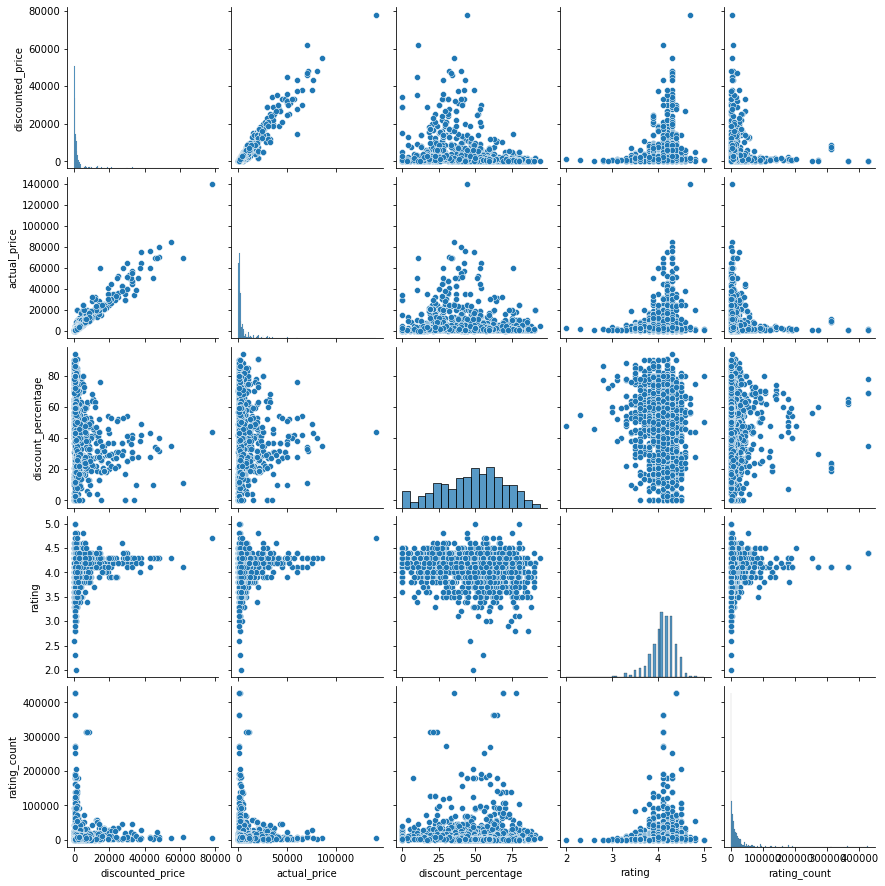

In [14]:
# Se grafican las relaciones cruzadas de todas las variables numéricas del dataframe
sns.pairplot(df)

La grafica de precio actual vs precio con descuento parece mostrar una correlación directa, pero esta conclusión no se puede dar debido a que no se puede establecer una causalidad entre las dos características con la información disponible.

Otra gráfica que puede ser de interés es la distribución de los porcentajes de descuento, la cual se muestra a continuación.

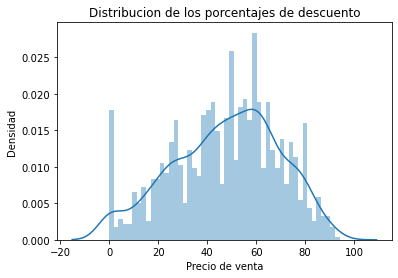

In [15]:
#histograma precio de venta
hist = sns.distplot(df['discount_percentage'], bins=50);
plt.title("Distribucion de los porcentajes de descuento")
plt.xlabel("Precio de venta")
plt.ylabel("Densidad")
plt.show()

A continuación, se muestran las categorías más frecuentes de los productos del dataframe.

In [16]:
col = "category"

categories = " ".join(df['category']).split(",")
categories1 = " ".join(categories).split('|')
counter_list = collections.Counter(categories1).most_common(20)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

data = [trace1]
layout = go.Layout(title="Categorias ", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Las columnas de about_product, review_title y review_content contienen información en su texto. Realizando nubes de palabras se puede verificar cuales son los términos más utilizados o de mayor frecuencia.

In [17]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
# Se extraen todas las palabras del título de la reseña
words = []
for title in df['review_title']:
    # Se excluyen todas las stop words
    for word in title.split(','):
        if word not in STOPWORDS:
            words.append(word)

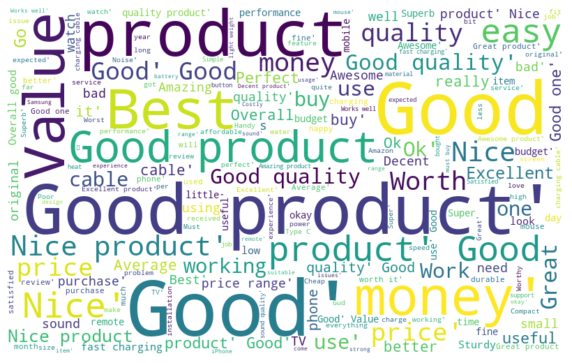

In [19]:
# Se crea la WordCloud con la lista de palabras
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110,
                      background_color='white').generate(str(words))


# Mostramos la imagen
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Para la review_title que es una receña corta se encuentran con mayor frecuencia las expresiones "Good product", "Best", "money", entre otros.

In [20]:
# Se extraen todas las palabras del contenido de la reseña
words1 = []
for title in df['review_content']:
    # Se excluyen todas las stop words
    for word in title.split(','):
        if word not in STOPWORDS:
            words1.append(word)

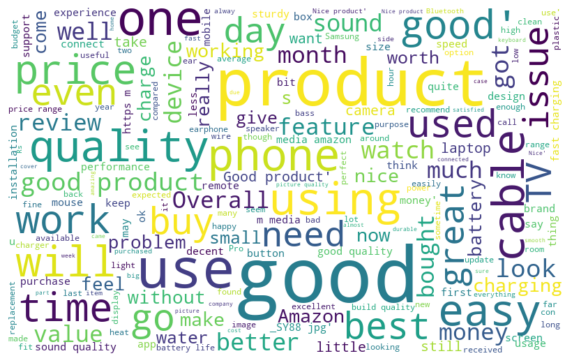

In [21]:
# Se crea la WordCloud con la lista de palabras
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110,
                      background_color='white').generate(str(words1))


# Mostramos la imagen
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

En review_content, que es una reseña larga, los terminos de mas relevancia son: "good", "product", "use", "quality", entre otras.

In [22]:
# Se extraen todas las palabras de la descripcion de los productos 
words2 = []
for title in df['about_product']:
    # Se excluyen todas las stop words
    for word in title.split(','):
        if word not in STOPWORDS:
            words2.append(word)

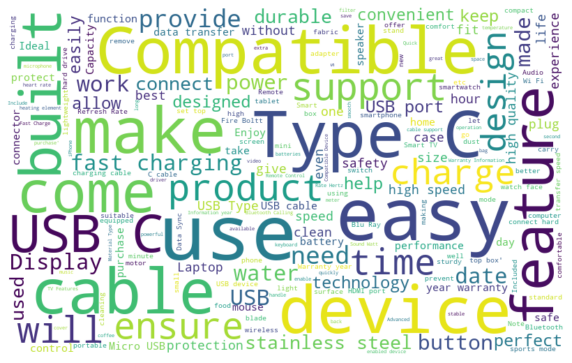

In [23]:
# Se crea la WordCloud con la lista de palabras
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110,
                      background_color='white').generate(str(words2))


# Mostramos la imagen
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

En la columna about_product donde se muestra una descripcion del producto se pueden ver con mayor frecuencia terminos como: "Compatible", "Type", "use", "easy", entre otros. 